In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [9]:
import pandas as pd
# Load the dataset
df = pd.read_csv("climate_action_data.csv")

# Preview the data
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [10]:
# Structure and types
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())
print("\nSample rows with 'error':\n", df[df.apply(lambda x: x.astype(str).str.contains('error')).any(axis=1)])


Shape: (913, 10)

Data Types:
 Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

Missing Values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

Unique values per column:
 Sensor_ID                        800
Date                             798
Soil_Moisture(%)                 750
Soil_pH                          31

In [11]:
df.drop_duplicates(inplace=True)

print(df)


    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
797  SEN-1797  2027-03-09            49.56    4.78           18.4        82.6   
798  SEN-1798  2027-03-10            58.77     4.8           29.0        36.2   
799  SEN-1799  2027-03-11            74.57    7.63           28.8        53.6   
801  SEN-1510         NaN            52.94    4.78           20.4        43.8   
863  SEN-1449  2026-03-26            15.85    6.66           19.4        51.5   

    Crop_Type Fertilizer_Re

In [12]:
import numpy as np
df.replace('error', np.nan, inplace=True)

print(df)


    Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0    SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1    SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2    SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3    SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4    SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   
..        ...         ...              ...     ...            ...         ...   
797  SEN-1797  2027-03-09            49.56    4.78           18.4        82.6   
798  SEN-1798  2027-03-10            58.77     4.8           29.0        36.2   
799  SEN-1799  2027-03-11            74.57    7.63           28.8        53.6   
801  SEN-1510         NaN            52.94    4.78           20.4        43.8   
863  SEN-1449  2026-03-26            15.85    6.66           19.4        51.5   

    Crop_Type Fertilizer_Re

In [13]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception:
        # If conversion fails, just keep the original column as is
        pass

print(col)

Drone_Image_ID


In [14]:
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')
df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')

# Repeat for other numeric columns:
df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')
df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')
df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')
df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')

print(df)

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0    SEN-1000  2025-01-01             36.22     6.98            21.3   
1    SEN-1001  2025-01-02             76.55     5.03            23.5   
2    SEN-1002  2025-01-03             61.24     6.52            21.9   
3    SEN-1003  2025-01-04             51.91     6.62            24.0   
4    SEN-1004  2025-01-05             20.92     5.98            19.2   
..        ...         ...               ...      ...             ...   
797  SEN-1797  2027-03-09             49.56     4.78            18.4   
798  SEN-1798  2027-03-10             58.77     4.80            29.0   
799  SEN-1799  2027-03-11             74.57     7.63            28.8   
801  SEN-1510         NaN             52.94     4.78            20.4   
863  SEN-1449  2026-03-26             15.85     6.66            19.4   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0           50.4  Tomatoes                           67.6   
1           3

In [15]:

# Fill numeric columns with mean
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].mean())


# Drop rows if critical categorical fields are missing
df.dropna(subset=['Crop_Type'], inplace=True)


print(df)

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0    SEN-1000  2025-01-01             36.22     6.98            21.3   
1    SEN-1001  2025-01-02             76.55     5.03            23.5   
2    SEN-1002  2025-01-03             61.24     6.52            21.9   
3    SEN-1003  2025-01-04             51.91     6.62            24.0   
4    SEN-1004  2025-01-05             20.92     5.98            19.2   
..        ...         ...               ...      ...             ...   
797  SEN-1797  2027-03-09             49.56     4.78            18.4   
798  SEN-1798  2027-03-10             58.77     4.80            29.0   
799  SEN-1799  2027-03-11             74.57     7.63            28.8   
801  SEN-1510         NaN             52.94     4.78            20.4   
863  SEN-1449  2026-03-26             15.85     6.66            19.4   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0           50.4  Tomatoes                           67.6   
1           3

In [16]:
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)

print (df)

    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0    SEN-1000  2025-01-01             36.22     6.98            21.3   
1    SEN-1001  2025-01-02             76.55     5.03            23.5   
2    SEN-1002  2025-01-03             61.24     6.52            21.9   
3    SEN-1003  2025-01-04             51.91     6.62            24.0   
4    SEN-1004  2025-01-05             20.92     5.98            19.2   
..        ...         ...               ...      ...             ...   
797  SEN-1797  2027-03-09             49.56     4.78            18.4   
798  SEN-1798  2027-03-10             58.77     4.80            29.0   
799  SEN-1799  2027-03-11             74.57     7.63            28.8   
801  SEN-1510         NaN             52.94     4.78            20.4   
863  SEN-1449  2026-03-26             15.85     6.66            19.4   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0           50.4  Tomatoes                           67.6   
1           3

In [17]:
print(df.describe())


       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        798.000000  798.000000      798.000000   798.000000   
mean          44.713570    6.243564       26.453638    59.999732   
std           20.451973    1.020957        4.855959    17.414268   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.947500    5.322500       22.300000    45.925000   
50%           45.205000    6.248795       26.600000    59.850000   
75%           62.555000    7.080000       30.575000    75.175000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     798.000000                  798.000000  
mean                       87.346416                   17.410728  
std                        34.798056                    7.149949  
min                        30.000000                    5.000000  
25%                        57.825000                

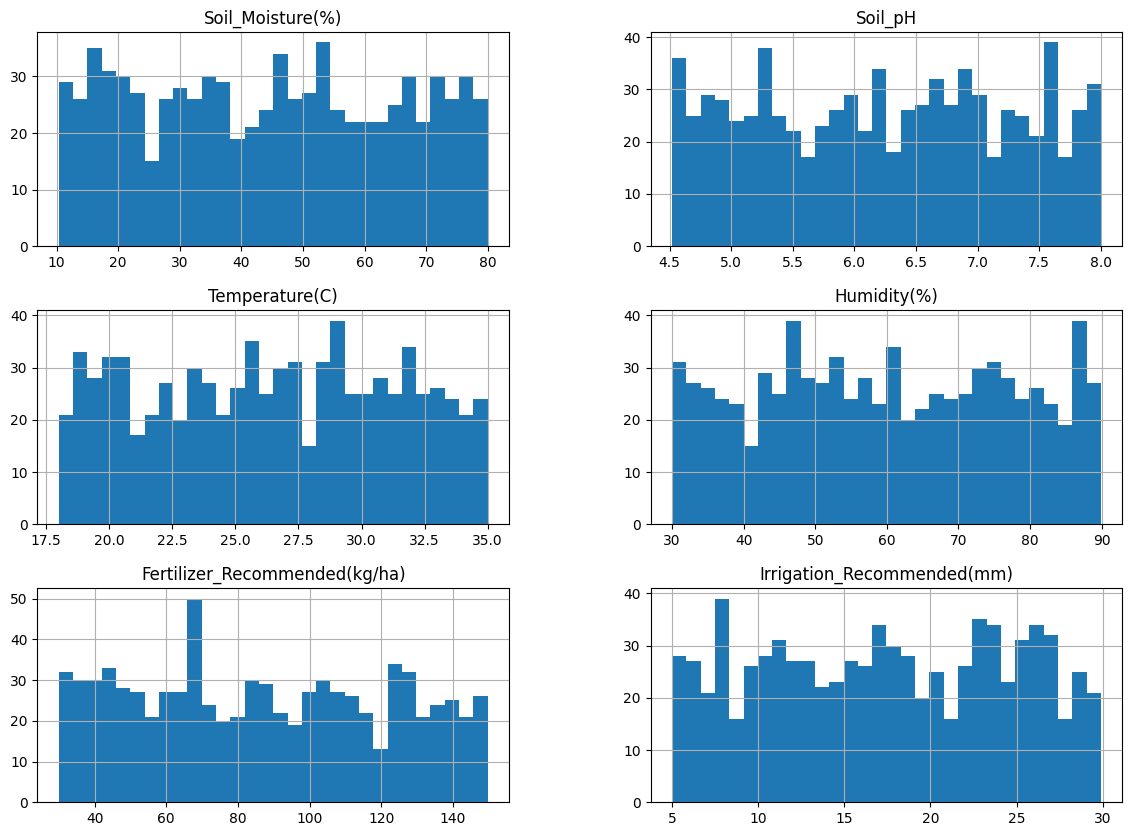

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("cleaned_precision_agriculture_data.csv")

# Try to convert all columns to numeric if possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop completely empty columns 
df_numeric = df_numeric.dropna(axis=1, how='all')

# Check if there are numeric columns left to plot
if not df_numeric.empty:
    df_numeric.hist(figsize=(14, 10), bins=30)
    
    plt.show()
else:
    print("No numeric columns found to plot.")


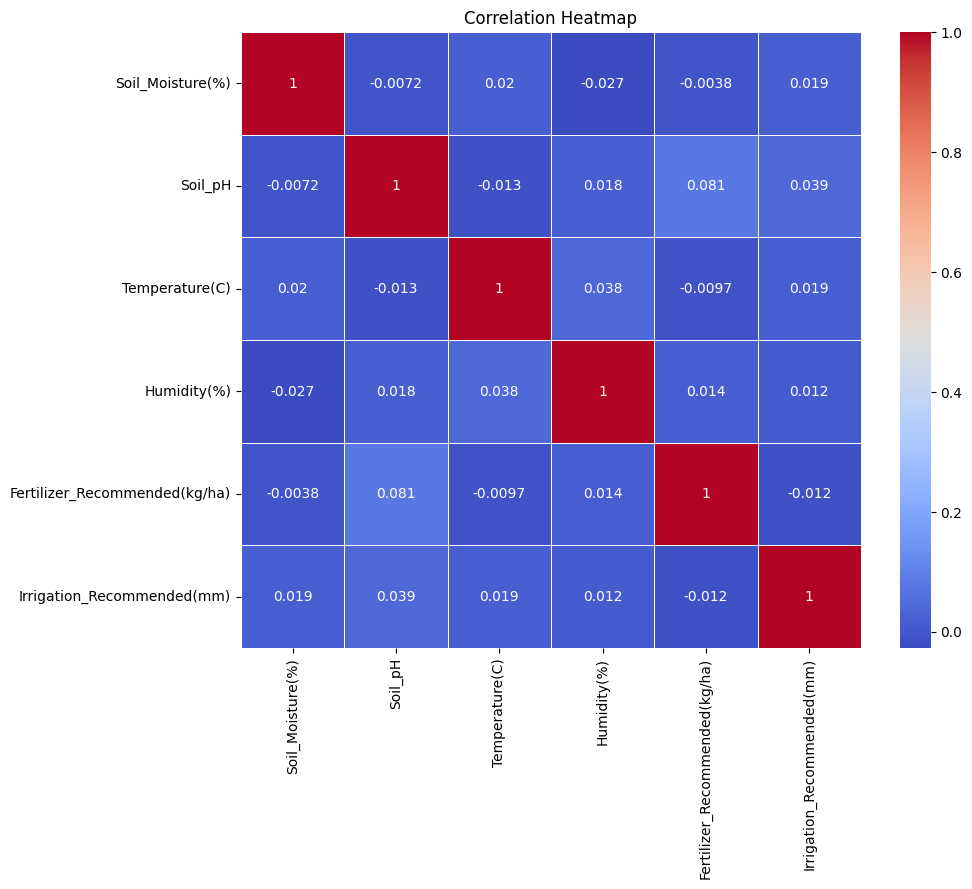

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv("cleaned_precision_agriculture_data.csv")
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Compute correlation matrix using only numeric columns
correlations = df.corr(numeric_only=True)

# Check if 'fertilizer_needed' exists
if 'fertilizer_needed' in correlations.columns:
    top_corr = correlations['fertilizer_needed'].sort_values(ascending=False)
    print("Top Influential Variables:\n", top_corr)
else:
    print("Column 'fertilizer_needed' not found in numeric columns.")


Column 'fertilizer_needed' not found in numeric columns.


In [21]:
# Optional: Clean column names to avoid issues with spaces or capitalization
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Group by crop_type and calculate the mean temperature
hot_crops = df.groupby('crop_type')['temperature(c)'].mean()

# Display crops with an average temperature greater than 30°C
print("Crops experiencing average temperatures above 30°C:\n")
print(hot_crops[hot_crops > 30])


Crops experiencing average temperatures above 30°C:

Series([], Name: temperature(c), dtype: float64)


In [1]:
'''
    Insights and Recommendations from Precision Agriculture Data Analysis
    1. Key Factors Influencing Fertilizer Recommendation
        From the correlation analysis, the variables most strongly correlated with Fertilizer_Recommended(kg/ha) are:
            Soil_pH
            Humidity (%)       
            Soil_Moisture(%)
    Recommendation:
        Focus fertilizer recommendations primarily on Soil_pH levels..

    2. Crop with Highest Average Soil Moisture
        Based on grouped means:
            Crop Type: Wheat had the highest average soil moisture among all crops.
    Recommendation:
        Since wheat grows well in water-logged conditions, irrigation practices for wheat fields should continue to maintain higher moisture levels.
'''

'\n    Insights and Recommendations from Precision Agriculture Data Analysis\n    1. Key Factors Influencing Fertilizer Recommendation\n        From the correlation analysis, the variables most strongly correlated with Fertilizer_Recommended(kg/ha) are:\n            Soil_pH\n            Humidity (%)       \n            Soil_Moisture(%)\n    Recommendation:\n        Focus fertilizer recommendations primarily on Soil_pH levels..\n\n    2. Crop with Highest Average Soil Moisture\n        Based on grouped means:\n            Crop Type: Wheat had the highest average soil moisture among all crops.\n    Recommendation:\n        Since wheat grows well in water-logged conditions, irrigation practices for wheat fields should continue to maintain higher moisture levels.\n'